# Setup Your Analysis Environment

1) Choose a directory to house your project in: 
```
.../<project-directory>
```


2) Create and activate a fresh Python3 virtual environment there: 
```
$ cd .../<project-directory>
$ python -m virtualenv env #Package tested on Python 3.6.8
$ source env/bin/activate
```

3) Download the `cosmicfish` package from Git: 
```
$ git clone git@github.com:ndeporzio/cosmicfish.git
```

4) Install the `cosmicfish` package. Note that its dependencies will install automatically.
```
$ cd cosmicfish
$ pip install . 
```

5) Launch Jupyter and open `tutorial.ipynb` notebook using Jupyter browser
```
$ jupyter notebook
```

6) Create a data folder where the analysis can store spectrum data. This can be anywhere you'd like - you'll specify the path below. 
```
$ mkdir <project-directory>/data
```

7) Install and build CLASS (if you don't already have a build). Note the `cosmicfish` package includes a method for downloading and installing CLASS for you. 
```
$ python 
>>> import cosmicfish
>>> cosmicfish.install_class('<project-directory>/class')
>>> exit()
```

# Setup Fiducial Cosmology

Import the analysis package.

In [ ]:
import cosmicfish as cf 

Import relevant python packages... 

In [ ]:
#Import relevant packages
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

Other setup steps... 

In [ ]:
#Instruct pyplot to use seaborn 
sns.set()

Specify the paths from the setup of your analysis environment above.  

In [ ]:
#Set project, data, CLASS directories 
projectdir = cf.correct_path("~/Desktop/test/")
datastore = cf.correct_path("/Volumes/SSD01/data/")
classpath = os.path.join(projectdir, "class")

Specify the values of your fiducial cosmology and other physical constants.

In [ ]:
#Setup fiducial cosmology, note change to N_ncdm... 
fid = {"A_s" : 2.2321e-9, 
        "n_s" : 0.96659,
        "omega_b" : 0.02226,
        "omega_cdm" : 0.11271,
        "tau_reio" : 0.059888,
        "h" : 0.70148,
        "N_ncdm" : 1, #Note the change! 
        "m_ncdm" : 0.1, #Comment out for N_ncdm=0
        "T_ncdm" : 1.4/2.726, #Comment out for N_ncdm=0
        "z_pk" : 0.7, 
        "T_cmb" : 2.726} #Not necessary, but helps neatness later on

A_s = fid['A_s']
n_s = fid['n_s']
omega_b = fid['omega_b']
omega_cdm = fid['omega_cdm']
tau_reio = fid['tau_reio']
h = fid['h']
z_pk = fid['z_pk']
T_cmb = fid['T_cmb'] #Units of K

c = 2.9979e8 #Units of m/s
H = 1000. * 100. * h #Units of m/s/Mpc
kp = 0.05 * h #Units of 1/Mpc

Specify the parameter values you'd like to use to compute the forecast...

In [ ]:
#Setup redshift bins, fiducial relica masses to sample
z_table = np.arange(1.0, 1.1, 0.1)
m_chi = 0.1

# Convergence Analysis

Before running the forecast, we want to ensure our cosmological parameters are well converged about the points we are interested in using to calculate Fisher matrices. To do so, we can use the `convergence_analysis` class of `cosmicfish`. 

We pass to `convergence_analysis` some fiducial cosmology, and then it will vary the parameters of that fiducial cosmology to values specified by the user and compute the corresponding power spectrum derivatives. You can choose to pass specific values of the fiducial cosmology, or choose to vary relative to the fiducial cosmology. 

First, specify the points in parameter space you'd like to sample: 

In [ ]:
T_chi_table = np.arange(1.8, 2.1, 0.02) / T_cmb #Units of T_cmb. We specify absolute values for the T_chi parameter.
nonT_relvary = np.arange(1.01, 1.11, 0.01) #We specify values relative to the fiducial cosmology for other parameters.

Then, we generate instances of the `convergence_analysis` class. It will search for pre-existing datasets for the specified points in parameter space in the datastore directory - otherwise, it will generate the dataset and place it in datastore. 

In [ ]:
conv1 = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore); 
conv2 = cf.convergence_analysis(fid, 'omega_b', 'rel', nonT_relvary, z_table, None, classpath, datastore);
conv3 = cf.convergence_analysis(fid, 'omega_cdm', 'rel', nonT_relvary, z_table, None, classpath, datastore);
conv4 = cf.convergence_analysis(fid, 'tau_reio', 'rel', nonT_relvary, z_table, None, classpath, datastore);
conv5 = cf.convergence_analysis(fid, 'h', 'rel', nonT_relvary, z_table, None, classpath, datastore);

At this point, all the useful information generated in the convergence analysis is accessed through the methods of the `convergence_analysis` objects. We use those methods to plot the results of the analysis...

### Convergence Power Spectra

In [ ]:
conv1.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv2.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv3.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv4.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv5.plot_ps(z_index=0, xscale='linear', plotdata=True)

### Convergence Derivatives of Power Spectra

In [ ]:
conv1.plot_dps(z_index=0, xscale='linear')
conv2.plot_dps(z_index=0, xscale='linear')
conv3.plot_dps(z_index=0, xscale='linear')
conv4.plot_dps(z_index=0, xscale='linear')
conv5.plot_dps(z_index=0, xscale='linear')

### Convergence Difference of Derivatives of Power Spectra

In [ ]:
conv1.plot_delta_dps(z_index=0, xscale='linear')
conv2.plot_delta_dps(z_index=0, xscale='linear')
conv3.plot_delta_dps(z_index=0, xscale='linear')
conv4.plot_delta_dps(z_index=0, xscale='linear')
conv5.plot_delta_dps(z_index=0, xscale='linear')

### Repeat for Other $m_\chi$

We can easily repeate the analysis above for other choice of $m_\chi$. 

In [ ]:
conv1a = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., -1.0), classpath, datastore)
conv1b = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., -0.8), classpath, datastore)
conv1c = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., -0.6), classpath, datastore)
conv1d = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., -0.4), classpath, datastore)
conv1e = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., -0.2), classpath, datastore)
conv1f = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 0.0), classpath, datastore)
conv1g = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 0.2), classpath, datastore)
conv1h = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 0.4), classpath, datastore)
conv1i = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 0.6), classpath, datastore)
conv1j = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 0.8), classpath, datastore)
conv1k = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, np.power(10., 1.0), classpath, datastore)

conv1a.plot_dps(z_index=1, xscale='linear')
conv1b.plot_dps(z_index=1, xscale='linear')
conv1c.plot_dps(z_index=0, xscale='linear')
conv1d.plot_dps(z_index=0, xscale='linear')
conv1e.plot_dps(z_index=0, xscale='linear')
conv1f.plot_dps(z_index=0, xscale='linear')
conv1g.plot_dps(z_index=0, xscale='linear')
conv1h.plot_dps(z_index=0, xscale='linear')
conv1i.plot_dps(z_index=0, xscale='linear')
conv1j.plot_dps(z_index=0, xscale='linear')
conv1k.plot_dps(z_index=0, xscale='linear')

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.
# Analysis - No Commentary

In [ ]:
#Import relevant packages
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cosmicfish as cf


#Instruct pyplot to use seaborn 
sns.set()

#Set project, data, CLASS directories 
projectdir = cf.correct_path("~/Desktop/test/")
datastore = cf.correct_path("~/Desktop/test/data/")
classpath = os.path.join(projectdir, "class")

#Setup fiducial cosmology, note change to N_ncdm... 
fid = {"A_s" : 2.2321e-9, 
        "n_s" : 0.96659,
        "omega_b" : 0.02226,
        "omega_cdm" : 0.11271,
        "tau_reio" : 0.059888,
        "h" : 0.70148,
        "N_ncdm" : 1, #Note the change! 
        "z_pk" : 0.7, 
        "T_cmb" : 2.726,
        "T_ncdm" : 1.5/2.726} #Not necessary, but helps neatness later on

A_s = fid['A_s']
n_s = fid['n_s']
omega_b = fid['omega_b']
omega_cdm = fid['omega_cdm']
tau_reio = fid['tau_reio']
h = fid['h']
z_pk = fid['z_pk']
T_cmb = fid['T_cmb'] #Units of K

c = 2.9979e8 #Units of m/s
H = 1000. * 100. * h #Units of m/s/Mpc
kp = 0.05 * h #Units of 1/Mpc


#Setup redshift bins, fiducial relica masses, relic temps to sample
#z_table = np.arange(1.4, 1.5, 0.1)
z_table = np.array([1.4, 1.5])
m_chi = 1.0
#T_chi_table = np.arange(1.0, 2.0, 0.1) / T_cmb #Units of T_cmb
T_chi_table = np.array([1.5]) / T_cmb #Units of T_cmb
#nonT_relvary = np.arange(1.0, 1.11, 0.01)
nonT_relvary = np.array([1.0])

In [ ]:
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 1.0)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.9)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.8)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.7)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.6)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.5)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.4)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.3)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.2)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.1)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., 0.0)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.1)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.2)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.3)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.4)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.5)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.6)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.7)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.8)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -0.9)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)

In [ ]:
datastore = cf.correct_path("~/Desktop/test/data/")
conv1 = cf.convergence_analysis(dict(fid, **{'m_ncdm' : np.power(10., -1.0)}), 'n_s', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.03)

In [ ]:
conv1 = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.01, fsky=0.3394)
#conv2 = cf.convergence_analysis(fid, 'omega_b', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.01);
#conv3 = cf.convergence_analysis(fid, 'omega_cdm', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.01);
#conv4 = cf.convergence_analysis(fid, 'tau_reio', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.01);
#conv5 = cf.convergence_analysis(fid, 'h', 'rel', nonT_relvary, z_table, None, classpath, datastore, dstep=0.01); 

In [ ]:
conv1.plot_ps(z_index=0, xscale='linear', plotdata=True)

In [ ]:
print(conv1.spectra[0][0].class_pk[34:60]*np.power(0.70148, -3))

In [ ]:
conv1.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv2.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv3.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv4.plot_ps(z_index=0, xscale='linear', plotdata=True)
conv5.plot_ps(z_index=0, xscale='linear', plotdata=True)

print('..................................................................................')
print('..................................................................................')
print('..................................................................................')

conv1.plot_dps(z_index=0, xscale='linear')
conv2.plot_dps(z_index=0, xscale='linear')
conv3.plot_dps(z_index=0, xscale='linear')
conv4.plot_dps(z_index=0, xscale='linear')
conv5.plot_dps(z_index=0, xscale='linear')

print('..................................................................................')
print('..................................................................................')
print('..................................................................................')

conv1.plot_delta_dps(z_index=0, xscale='linear')
conv2.plot_delta_dps(z_index=0, xscale='linear')
conv3.plot_delta_dps(z_index=0, xscale='linear')
conv4.plot_delta_dps(z_index=0, xscale='linear')
conv5.plot_delta_dps(z_index=0, xscale='linear')

In [ ]:
#Setup redshift bins, fiducial relica masses, relic temps to sample
z_table = np.arange(1.0, 1.1, 0.1)
m_chi = 0.1
T_chi_table = np.arange(1.5, 1.6, 0.1) / T_cmb #Units of T_cmb

conv1a = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.01)
conv1b = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.02)
conv1c = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.03)
conv1d = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.04)
conv1e = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.05)
conv1f = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.06)
conv1g = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.07)
conv1h = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.08)
conv1i = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.09)
conv1j = cf.convergence_analysis(fid, 'T_ncdm', 'abs', T_chi_table, z_table, m_chi, classpath, datastore, dstep=0.10)

In [ ]:
sns.set()
sns.set_palette("Blues_d", n_colors=10)
plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(1, 2, 1)

ax1.plot(conv1a.spectra[0][0].k_table, conv1a.dps[0][0], label='step=1%')
ax1.plot(conv1b.spectra[0][0].k_table, conv1b.dps[0][0], label='step=2%')
ax1.plot(conv1c.spectra[0][0].k_table, conv1c.dps[0][0], label='step=3%')
ax1.plot(conv1d.spectra[0][0].k_table, conv1d.dps[0][0], label='step=4%')
ax1.plot(conv1e.spectra[0][0].k_table, conv1e.dps[0][0], label='step=5%')
ax1.plot(conv1f.spectra[0][0].k_table, conv1f.dps[0][0], label='step=6%')
ax1.plot(conv1g.spectra[0][0].k_table, conv1g.dps[0][0], label='step=7%')
ax1.plot(conv1h.spectra[0][0].k_table, conv1h.dps[0][0], label='step=8%')
ax1.plot(conv1i.spectra[0][0].k_table, conv1i.dps[0][0], label='step=9%')
ax1.plot(conv1j.spectra[0][0].k_table, conv1j.dps[0][0], label='step=10%')

ax1.set_title(r'$\partial P_g / \partial$ T_ncdm for z=1.0, m_ncdm=0.1 [eV]')
ax1.set_xlabel(r'k [Mpc$^{-1}$]')
ax1.set_ylabel(r'[Mpc$^3$ / (units of T_ncdm)]')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(conv1a.spectra[0][0].k_table, conv1a.dlogps[0][0], label='step=1%')
ax2.plot(conv1b.spectra[0][0].k_table, conv1b.dlogps[0][0], label='step=2%')
ax2.plot(conv1c.spectra[0][0].k_table, conv1c.dlogps[0][0], label='step=3%')
ax2.plot(conv1d.spectra[0][0].k_table, conv1d.dlogps[0][0], label='step=4%')
ax2.plot(conv1e.spectra[0][0].k_table, conv1e.dlogps[0][0], label='step=5%')
ax2.plot(conv1f.spectra[0][0].k_table, conv1f.dlogps[0][0], label='step=6%')
ax2.plot(conv1g.spectra[0][0].k_table, conv1g.dlogps[0][0], label='step=7%')
ax2.plot(conv1h.spectra[0][0].k_table, conv1h.dlogps[0][0], label='step=8%')
ax2.plot(conv1i.spectra[0][0].k_table, conv1i.dlogps[0][0], label='step=9%')
ax2.plot(conv1j.spectra[0][0].k_table, conv1j.dlogps[0][0], label='step=10%')
ax2.set_title(r'$\partial log(P_g) / \partial$ T_ncdm for z=1.0, m_ncdm=0.1 [eV]')
ax2.set_xlabel(r'k [Mpc$^{-1}$]')
ax2.set_ylabel(r'[Mpc$^3$ / (units of T_ncdm)]')
ax2.legend()
        
plt.show()


domega_chi_dT_chi = (3* np.power(1.5, 2.) * 0.1) / (np.power(1.95, 3.) * 94.)

sns.set()
sns.set_palette("Blues_d", n_colors=10)
plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(1, 2, 1)

ax1.plot(conv1a.spectra[0][0].k_table, conv1a.dps[0][0]/domega_chi_dT_chi, label='step=1%')
ax1.plot(conv1b.spectra[0][0].k_table, conv1b.dps[0][0]/domega_chi_dT_chi, label='step=2%')
ax1.plot(conv1c.spectra[0][0].k_table, conv1c.dps[0][0]/domega_chi_dT_chi, label='step=3%')
ax1.plot(conv1d.spectra[0][0].k_table, conv1d.dps[0][0]/domega_chi_dT_chi, label='step=4%')
ax1.plot(conv1e.spectra[0][0].k_table, conv1e.dps[0][0]/domega_chi_dT_chi, label='step=5%')
ax1.plot(conv1f.spectra[0][0].k_table, conv1f.dps[0][0]/domega_chi_dT_chi, label='step=6%')
ax1.plot(conv1g.spectra[0][0].k_table, conv1g.dps[0][0]/domega_chi_dT_chi, label='step=7%')
ax1.plot(conv1h.spectra[0][0].k_table, conv1h.dps[0][0]/domega_chi_dT_chi, label='step=8%')
ax1.plot(conv1i.spectra[0][0].k_table, conv1i.dps[0][0]/domega_chi_dT_chi, label='step=9%')
ax1.plot(conv1j.spectra[0][0].k_table, conv1j.dps[0][0]/domega_chi_dT_chi, label='step=10%')

ax1.set_title(r'$\partial P_g / \partial$ omega_ncdm for z=1.0, m_ncdm=0.1 [eV]')
ax1.set_xlabel(r'k [Mpc$^{-1}$]')
ax1.set_ylabel(r'[Mpc$^3$ / (units of omega_ncdm)]')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(conv1a.spectra[0][0].k_table, conv1a.dlogps[0][0]/domega_chi_dT_chi, label='step=1%')
ax2.plot(conv1b.spectra[0][0].k_table, conv1b.dlogps[0][0]/domega_chi_dT_chi, label='step=2%')
ax2.plot(conv1c.spectra[0][0].k_table, conv1c.dlogps[0][0]/domega_chi_dT_chi, label='step=3%')
ax2.plot(conv1d.spectra[0][0].k_table, conv1d.dlogps[0][0]/domega_chi_dT_chi, label='step=4%')
ax2.plot(conv1e.spectra[0][0].k_table, conv1e.dlogps[0][0]/domega_chi_dT_chi, label='step=5%')
ax2.plot(conv1f.spectra[0][0].k_table, conv1f.dlogps[0][0]/domega_chi_dT_chi, label='step=6%')
ax2.plot(conv1g.spectra[0][0].k_table, conv1g.dlogps[0][0]/domega_chi_dT_chi, label='step=7%')
ax2.plot(conv1h.spectra[0][0].k_table, conv1h.dlogps[0][0]/domega_chi_dT_chi, label='step=8%')
ax2.plot(conv1i.spectra[0][0].k_table, conv1i.dlogps[0][0]/domega_chi_dT_chi, label='step=9%')
ax2.plot(conv1j.spectra[0][0].k_table, conv1j.dlogps[0][0]/domega_chi_dT_chi, label='step=10%')
ax2.set_title(r'$\partial log(P_g) / \partial$ omega_ncdm for z=1.0, m_ncdm=0.1 [eV]')
ax2.set_xlabel(r'k [Mpc$^{-1}$]')
ax2.set_ylabel(r'[Mpc$^3$ / (units of omega_ncdm)]')
ax2.legend()
        
plt.show()

sns.set()
sns.set_palette("Blues_d", n_colors=10)
plt.figure(figsize=(15, 7.5))
ax1 = plt.subplot(1, 2, 1)

ax1.plot(conv1a.spectra[0][0].k_table, conv1a.dps[0][0]/domega_chi_dT_chi - conv1b.dps[0][0]/domega_chi_dT_chi, label='step=1%')
ax1.plot(conv1b.spectra[0][0].k_table, conv1b.dps[0][0]/domega_chi_dT_chi - conv1c.dps[0][0]/domega_chi_dT_chi, label='step=2%')
ax1.plot(conv1c.spectra[0][0].k_table, conv1c.dps[0][0]/domega_chi_dT_chi - conv1d.dps[0][0]/domega_chi_dT_chi, label='step=3%')
ax1.plot(conv1d.spectra[0][0].k_table, conv1d.dps[0][0]/domega_chi_dT_chi - conv1e.dps[0][0]/domega_chi_dT_chi, label='step=4%')
ax1.plot(conv1e.spectra[0][0].k_table, conv1e.dps[0][0]/domega_chi_dT_chi - conv1f.dps[0][0]/domega_chi_dT_chi, label='step=5%')
ax1.plot(conv1f.spectra[0][0].k_table, conv1f.dps[0][0]/domega_chi_dT_chi - conv1g.dps[0][0]/domega_chi_dT_chi, label='step=6%')
ax1.plot(conv1g.spectra[0][0].k_table, conv1g.dps[0][0]/domega_chi_dT_chi - conv1h.dps[0][0]/domega_chi_dT_chi, label='step=7%')
ax1.plot(conv1h.spectra[0][0].k_table, conv1h.dps[0][0]/domega_chi_dT_chi - conv1i.dps[0][0]/domega_chi_dT_chi, label='step=8%')

ax1.set_title(r'$\Delta(\partial P_g / \partial$ omega_ncdm) for z=1.0, m_ncdm=0.1 [eV]')
ax1.set_xlabel(r'k [Mpc$^{-1}$]')
ax1.set_ylabel(r'[Mpc$^3$ / (units of omega_ncdm)]')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(conv1a.spectra[0][0].k_table, conv1a.dlogps[0][0]/domega_chi_dT_chi - conv1b.dlogps[0][0]/domega_chi_dT_chi, label='step=1%')
ax2.plot(conv1b.spectra[0][0].k_table, conv1b.dlogps[0][0]/domega_chi_dT_chi - conv1c.dlogps[0][0]/domega_chi_dT_chi, label='step=2%')
ax2.plot(conv1c.spectra[0][0].k_table, conv1c.dlogps[0][0]/domega_chi_dT_chi - conv1d.dlogps[0][0]/domega_chi_dT_chi, label='step=3%')
ax2.plot(conv1d.spectra[0][0].k_table, conv1d.dlogps[0][0]/domega_chi_dT_chi - conv1e.dlogps[0][0]/domega_chi_dT_chi, label='step=4%')
ax2.plot(conv1e.spectra[0][0].k_table, conv1e.dlogps[0][0]/domega_chi_dT_chi - conv1f.dlogps[0][0]/domega_chi_dT_chi, label='step=5%')
ax2.plot(conv1f.spectra[0][0].k_table, conv1f.dlogps[0][0]/domega_chi_dT_chi - conv1g.dlogps[0][0]/domega_chi_dT_chi, label='step=6%')
ax2.plot(conv1g.spectra[0][0].k_table, conv1g.dlogps[0][0]/domega_chi_dT_chi - conv1h.dlogps[0][0]/domega_chi_dT_chi, label='step=7%')
ax2.plot(conv1h.spectra[0][0].k_table, conv1h.dlogps[0][0]/domega_chi_dT_chi - conv1i.dlogps[0][0]/domega_chi_dT_chi, label='step=8%')
ax2.plot(conv1i.spectra[0][0].k_table, conv1i.dlogps[0][0]/domega_chi_dT_chi - conv1j.dlogps[0][0]/domega_chi_dT_chi, label='step=9%')
ax2.set_title(r'$\Delta(\partial log(P_g) / \partial$ omega_ncdm) for z=1.0, m_ncdm=0.1 [eV]')
ax2.set_xlabel(r'k [Mpc$^{-1}$]')
ax2.set_ylabel(r'[Mpc$^3$ / (units of omega_ncdm)]')
ax2.legend()
        
plt.show()




.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [1]:
#Import relevant packages
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cosmicfish as cf


#Instruct pyplot to use seaborn 
sns.set()

#Set project, data, CLASS directories 
projectdir = cf.correct_path("~/Desktop/test/")
datastore = cf.correct_path("~/Desktop/test/data/")
classpath = os.path.join(projectdir, "class")

#Setup fiducial cosmology, note change to N_ncdm... 
fid = {"A_s" : 2.2321e-9, 
       "n_s" : 0.96659,
       "omega_b" : 0.02226,
       "omega_cdm" : 0.11271,
       "tau_reio" : 0.059888,
       "h" : 0.70148,
       "z_pk" : 1.4, 
       "T_cmb" : 2.726,
       "N_ncdm" : 3., 
       #"T_ncdm" : 1.5 / 2.726, #Only uncomment when forecasting relics
       "m_ncdm" : 0.02} 


c = 2.9979e8 #Units of m/s
H = 1000. * 100. * fid['h'] #Units of m/s/Mpc
kp = 0.05 * fid['h'] #Units of 1/Mpc\
skycover = 14000. #Sky coverage of survey in degrees^2


#Setup redshift bins, fiducial relica masses, relic temps to sample
z_table = np.arange(0.65, 1.85, 0.1)
dNdz = np.array([309., 2269., 1923., 2094., 1441., 1353., 1337., 523., 466., 329., 126., 0., 0.])
mu_step = 0.05 #For calculating numerical integral wrt mu between -1 and 1 

In [2]:
lightrelic = cf.forecast(classpath, datastore, 'neutrino', fid, z_table, dNdz, fcoverage_deg=skycover, dstep=0.03)

In [3]:
lightrelic.gen_pg()

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383154.9677070.202398
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists w

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383187.26290420.324677
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists 

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383292.0820170.754255
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists w

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383318.70693090.609916
Data was not generated by CLASS for this run!A directory exists 

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Dataset already exists at: /Users/nicholasdeporzio/Desktop/test/data/1565383693.15692690.748889
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists 

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data files.
Data was not generated by CLASS for this run!A directory exists without data

In [4]:
lightrelic.print_v_table()

For z = 0.65 
	V = 2.926862 [h^-3 Gpc^3] 
	nbar = 147803.349863 [h^3 Gpc^-3] 
	nbar = 5.101879e-05 [Mpc^-3] 
	nbar/deg^2 = 1.055738e+01 [h^3 Gpc^-3 deg^-2] 
	nbar/deg^2 = 3.644199e-09 [Mpc^-3 deg^-2] 
	D = 0.727178 
	b_ELG = 1.155150 
	
For z = 0.75 
	V = 3.464387 [h^-3 Gpc^3] 
	nbar = 916929.919954 [h^3 Gpc^-3] 
	nbar = 3.165061e-04 [Mpc^-3] 
	nbar/deg^2 = 6.549499e+01 [h^3 Gpc^-3 deg^-2] 
	nbar/deg^2 = 2.260758e-08 [Mpc^-3 deg^-2] 
	D = 0.694241 
	b_ELG = 1.209955 
	
For z = 0.85 
	V = 3.815583 [h^-3 Gpc^3] 
	nbar = 705580.340493 [h^3 Gpc^-3] 
	nbar = 2.435524e-04 [Mpc^-3] 
	nbar/deg^2 = 5.039860e+01 [h^3 Gpc^-3 deg^-2] 
	nbar/deg^2 = 1.739660e-08 [Mpc^-3 deg^-2] 
	D = 0.663587 
	b_ELG = 1.265848 
	
For z = 0.95 
	V = 4.340863 [h^-3 Gpc^3] 
	nbar = 675349.555760 [h^3 Gpc^-3] 
	nbar = 2.331173e-04 [Mpc^-3] 
	nbar/deg^2 = 4.823925e+01 [h^3 Gpc^-3 deg^-2] 
	nbar/deg^2 = 1.665124e-08 [Mpc^-3 deg^-2] 
	D = 0.635073 
	b_ELG = 1.322682 
	
For z = 1.05 
	V = 4.747139 [h^-3 Gpc^3] 
	nbar = 42

In [5]:
lightrelic.gen_fisher(mu_step)

Fisher element ( 0 ,  0 ) calculated...
Fisher element ( 0 ,  1 ) calculated...
Fisher element ( 0 ,  2 ) calculated...
Fisher element ( 0 ,  3 ) calculated...
Fisher element ( 0 ,  4 ) calculated...
Fisher element ( 0 ,  5 ) calculated...
Fisher element ( 0 ,  6 ) calculated...
Fisher element ( 0 ,  7 ) calculated...
Fisher element ( 0 ,  8 ) calculated...
Fisher element ( 0 ,  9 ) calculated...
Fisher element ( 1 ,  0 ) calculated...
Fisher element ( 1 ,  1 ) calculated...
Fisher element ( 1 ,  2 ) calculated...
Fisher element ( 1 ,  3 ) calculated...
Fisher element ( 1 ,  4 ) calculated...
Fisher element ( 1 ,  5 ) calculated...
Fisher element ( 1 ,  6 ) calculated...
Fisher element ( 1 ,  7 ) calculated...
Fisher element ( 1 ,  8 ) calculated...
Fisher element ( 1 ,  9 ) calculated...
Fisher element ( 2 ,  0 ) calculated...
Fisher element ( 2 ,  1 ) calculated...
Fisher element ( 2 ,  2 ) calculated...
Fisher element ( 2 ,  3 ) calculated...
Fisher element ( 2 ,  4 ) calculated...


In [6]:
lightrelic.print_P_table()

For z = 0.65,	 P(0.2h, 0) = 8213.69

For z = 0.75,	 P(0.2h, 0) = 7486.53

For z = 0.85,	 P(0.2h, 0) = 6839.99

For z = 0.95,	 P(0.2h, 0) = 6264.80

For z = 1.05,	 P(0.2h, 0) = 5752.47

For z = 1.15,	 P(0.2h, 0) = 5295.37

For z = 1.25,	 P(0.2h, 0) = 4886.72

For z = 1.35,	 P(0.2h, 0) = 4520.59

For z = 1.45,	 P(0.2h, 0) = 4191.77

For z = 1.55,	 P(0.2h, 0) = 3895.75

For z = 1.65,	 P(0.2h, 0) = 3628.58

For z = 1.75,	 P(0.2h, 0) = 3386.86

For z = 1.85,	 P(0.2h, 0) = 3167.62



In [7]:
lssfisher = lightrelic.fisher
lssfisher = pd.DataFrame(lssfisher,  columns=['omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'M_ncdm', 'sigma_fog', 'bLbar', 'alpha_k2'])
lssfisher.iloc[:,7] *= 1e3 #To correct units on sigma_fog
lssfisher.iloc[7,:] *= 1e3 #To correct units on sigam_fog
lssfisher

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,M_ncdm,sigma_fog,bLbar,alpha_k2
0,2.672588e+08,-1.990925e+08,-1.659446e+07,-7.220970e+15,2.832007e+04,-4.140288e+07,4.801453e+06,1.694029e+04,-1.667414e+07,-2.366958e+05
1,-1.990925e+08,1.973706e+08,1.628726e+07,6.127717e+15,-2.408214e+04,4.462383e+07,-3.907633e+06,-2.532511e+04,1.366082e+07,2.368112e+05
2,-1.659446e+07,1.628726e+07,1.445970e+06,4.943867e+14,-1.944706e+03,3.438339e+06,-3.158721e+05,-1.942613e+03,1.121704e+06,2.177657e+04
3,-7.220970e+15,6.127717e+15,4.943867e+14,2.124846e+23,-8.337913e+11,1.313653e+15,-1.394146e+14,-6.313986e+11,4.830614e+14,7.072440e+12
4,2.832007e+04,-2.408214e+04,-1.944706e+03,-8.337913e+11,3.290423e+00,-5.167218e+03,5.470675e+02,2.487239e+00,-1.895564e+03,-2.790728e+01
5,-4.140288e+07,4.462383e+07,3.438339e+06,1.313653e+15,-5.167218e+03,1.257251e+07,-8.063680e+05,-7.534798e+03,2.812488e+06,5.028558e+04
6,4.801453e+06,-3.907633e+06,-3.158721e+05,-1.394146e+14,5.470675e+02,-8.063680e+05,9.232640e+04,3.629433e+02,-3.191447e+05,-4.494737e+03
7,1.694029e+04,-2.532511e+04,-1.942613e+03,-6.313986e+11,2.487239e+00,-7.534798e+03,3.629433e+02,5.195859e+00,-1.280271e+03,-2.880349e+01
8,-1.667414e+07,1.366082e+07,1.121704e+06,4.830614e+14,-1.895564e+03,2.812488e+06,-3.191447e+05,-1.280271e+03,1.113579e+06,1.624340e+04
9,-2.366958e+05,2.368112e+05,2.177657e+04,7.072440e+12,-2.790728e+01,5.028558e+04,-4.494737e+03,-2.880349e+01,1.624340e+04,3.656270e+02


In [8]:
lssfisher.iloc[:,6] *= 3. # Correct from total neutrino mass to single neutrino mass
lssfisher.iloc[6,:] *= 3. # Correct from total neutrino mass to single neutrino mass
lssfisher = lssfisher.rename(index=str, columns={"M_ncdm": "m_ncdm"})
lssfisher

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm,sigma_fog,bLbar,alpha_k2
0,2.672588e+08,-1.990925e+08,-1.659446e+07,-7.220970e+15,2.832007e+04,-4.140288e+07,1.440436e+07,1.694029e+04,-1.667414e+07,-2.366958e+05
1,-1.990925e+08,1.973706e+08,1.628726e+07,6.127717e+15,-2.408214e+04,4.462383e+07,-1.172290e+07,-2.532511e+04,1.366082e+07,2.368112e+05
2,-1.659446e+07,1.628726e+07,1.445970e+06,4.943867e+14,-1.944706e+03,3.438339e+06,-9.476162e+05,-1.942613e+03,1.121704e+06,2.177657e+04
3,-7.220970e+15,6.127717e+15,4.943867e+14,2.124846e+23,-8.337913e+11,1.313653e+15,-4.182438e+14,-6.313986e+11,4.830614e+14,7.072440e+12
4,2.832007e+04,-2.408214e+04,-1.944706e+03,-8.337913e+11,3.290423e+00,-5.167218e+03,1.641202e+03,2.487239e+00,-1.895564e+03,-2.790728e+01
5,-4.140288e+07,4.462383e+07,3.438339e+06,1.313653e+15,-5.167218e+03,1.257251e+07,-2.419104e+06,-7.534798e+03,2.812488e+06,5.028558e+04
6,1.440436e+07,-1.172290e+07,-9.476162e+05,-4.182438e+14,1.641202e+03,-2.419104e+06,8.309376e+05,1.088830e+03,-9.574340e+05,-1.348421e+04
7,1.694029e+04,-2.532511e+04,-1.942613e+03,-6.313986e+11,2.487239e+00,-7.534798e+03,1.088830e+03,5.195859e+00,-1.280271e+03,-2.880349e+01
8,-1.667414e+07,1.366082e+07,1.121704e+06,4.830614e+14,-1.895564e+03,2.812488e+06,-9.574340e+05,-1.280271e+03,1.113579e+06,1.624340e+04
9,-2.366958e+05,2.368112e+05,2.177657e+04,7.072440e+12,-2.790728e+01,5.028558e+04,-1.348421e+04,-2.880349e+01,1.624340e+04,3.656270e+02


In [9]:
lsscovariance = np.linalg.inv(lssfisher)
lsscovariance = pd.DataFrame(lsscovariance, columns=lssfisher.columns)
lsscovariance

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm,sigma_fog,bLbar,alpha_k2
0,4.479166e-07,1.488778e-06,-4.456818e-06,4.362983e-14,4.075262e-04,3.795577e-06,2.946801e-05,8.741181e-03,1.061014e-07,2.697216e-05
1,1.488778e-06,9.984745e-06,-4.029908e-05,1.815186e-13,2.090981e-03,1.768222e-05,1.606335e-04,4.502453e-02,5.406300e-06,3.444501e-04
2,-4.456818e-06,-4.029908e-05,1.899312e-04,-6.835584e-13,-8.101272e-03,-6.108024e-05,-6.307677e-04,-1.650909e-01,-2.784159e-05,-2.123066e-03
3,4.362983e-14,1.815186e-13,-6.835584e-13,1.602795e-20,1.296772e-10,4.023018e-13,7.905357e-12,1.199136e-09,-5.514193e-13,6.435227e-12
4,4.075262e-04,2.090981e-03,-8.101272e-03,1.296772e-10,5.666588e+01,4.605313e-03,-2.558519e-02,7.928249e+00,1.598204e-03,1.854081e-01
5,3.795577e-06,1.768222e-05,-6.108024e-05,4.023018e-13,4.605313e-03,3.986549e-05,3.127347e-04,9.335374e-02,3.662557e-06,4.544979e-04
6,2.946801e-05,1.606335e-04,-6.307677e-04,7.905357e-12,-2.558519e-02,3.127347e-04,4.882433e-03,8.748546e-01,-2.013782e-05,4.602002e-03
7,8.741181e-03,4.502453e-02,-1.650909e-01,1.199136e-09,7.928249e+00,9.335374e-02,8.748546e-01,2.309040e+02,7.717859e-04,1.320815e+00
8,1.061014e-07,5.406300e-06,-2.784159e-05,-5.514193e-13,1.598204e-03,3.662557e-06,-2.013782e-05,7.717859e-04,1.882823e-04,-5.366474e-04
9,2.697216e-05,3.444501e-04,-2.123066e-03,6.435227e-12,1.854081e-01,4.544979e-04,4.602002e-03,1.320815e+00,-5.366474e-04,4.832763e-02


In [10]:
cmbfisher = pd.read_csv("~/Desktop/CMBS4_Fisher.dat", sep='\t', header=0)
pd.DataFrame(cmbfisher)

,omega_b,omega_cdm,n_s,A_s,tau_reio,H_0,M_ncdm
0,5.671444e+09,-8.256715e+08,1.262203e+08,4.427530e+16,-1.865828e+08,-2.423918e+06,-2.292377e+07
1,-8.256715e+08,2.721312e+08,-1.455229e+07,-5.958876e+15,2.938383e+07,6.313072e+05,5.264818e+06
2,1.262203e+08,-1.455229e+07,4.507586e+06,1.756750e+15,-7.224198e+06,-4.846603e+04,-5.002335e+05
3,4.427530e+16,-5.958876e+15,1.756750e+15,8.574492e+23,-3.462911e+15,-1.936594e+13,-2.140669e+14
4,-1.865828e+08,2.938383e+07,-7.224198e+06,-3.462911e+15,1.464674e+07,7.724960e+04,7.583209e+05
5,-2.423918e+06,6.313072e+05,-4.846603e+04,-1.936594e+13,7.724960e+04,1.847058e+03,1.797380e+04
6,-2.292377e+07,5.264818e+06,-5.002335e+05,-2.140669e+14,7.583209e+05,1.797380e+04,1.906145e+05


In [11]:
cmbfisher.iloc[:,5] *= 100.
cmbfisher.iloc[5,:] *= 100.
cmbfisher.iloc[:,6] *= 3.
cmbfisher.iloc[6,:] *= 3.
cmbfisher = cmbfisher.rename(index=str, columns={"H_0": "h", "M_ncdm": "m_ncdm"})
cmbfisher

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm
0,5.671444e+09,-8.256715e+08,1.262203e+08,4.427530e+16,-1.865828e+08,-2.423918e+08,-6.877131e+07
1,-8.256715e+08,2.721312e+08,-1.455229e+07,-5.958876e+15,2.938383e+07,6.313072e+07,1.579445e+07
2,1.262203e+08,-1.455229e+07,4.507586e+06,1.756750e+15,-7.224198e+06,-4.846603e+06,-1.500700e+06
3,4.427530e+16,-5.958876e+15,1.756750e+15,8.574492e+23,-3.462911e+15,-1.936594e+15,-6.422007e+14
4,-1.865828e+08,2.938383e+07,-7.224198e+06,-3.462911e+15,1.464674e+07,7.724960e+06,2.274963e+06
5,-2.423918e+08,6.313072e+07,-4.846603e+06,-1.936594e+15,7.724960e+06,1.847058e+07,5.392139e+06
6,-6.877131e+07,1.579445e+07,-1.500700e+06,-6.422007e+14,2.274963e+06,5.392139e+06,1.715530e+06


In [12]:
cmbcovariance = pd.DataFrame(np.linalg.inv(cmbfisher), columns=cmbfisher.columns)
cmbcovariance

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm
0,9.698656e-10,-3.706216e-09,-2.040187e-08,-1.089038e-16,-2.612849e-08,6.352855e-08,-1.506427e-07
1,-3.706216e-09,5.915852e-07,-1.271759e-06,5.626026e-16,-6.489262e-07,-5.198475e-06,1.070300e-05
2,-2.040187e-08,-1.271759e-06,4.795502e-06,-2.986842e-17,2.392210e-06,1.042241e-05,-2.085664e-05
3,-1.089038e-16,5.626026e-16,-2.986842e-17,1.066603e-21,2.459298e-13,-1.570631e-13,5.572492e-13
4,-2.612849e-08,-6.489262e-07,2.392210e-06,2.459298e-13,5.810323e-05,-2.965731e-05,1.152486e-04
5,6.352855e-08,-5.198475e-06,1.042241e-05,-1.570631e-13,-2.965731e-05,6.833625e-05,-1.747322e-04
6,-1.506427e-07,1.070300e-05,-2.085664e-05,5.572492e-13,1.152486e-04,-1.747322e-04,4.827385e-04


In [13]:
fullfisher = lssfisher 
fullfisher.iloc[0:6, 0:6] += cmbfisher
fullfisher

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm,sigma_fog,bLbar,alpha_k2
0,5.938703e+09,-1.024764e+09,1.096259e+08,3.705433e+16,-1.865545e+08,-2.837947e+08,1.440436e+07,1.694029e+04,-1.667414e+07,-2.366958e+05
1,-1.024764e+09,4.695018e+08,1.734971e+06,1.688403e+14,2.935975e+07,1.077545e+08,-1.172290e+07,-2.532511e+04,1.366082e+07,2.368112e+05
2,1.096259e+08,1.734971e+06,5.953556e+06,2.251136e+15,-7.226142e+06,-1.408264e+06,-9.476162e+05,-1.942613e+03,1.121704e+06,2.177657e+04
3,3.705433e+16,1.688403e+14,2.251136e+15,1.069934e+24,-3.463744e+15,-6.229405e+14,-4.182438e+14,-6.313986e+11,4.830614e+14,7.072440e+12
4,-1.865545e+08,2.935975e+07,-7.226142e+06,-3.463744e+15,1.464674e+07,7.719793e+06,1.641202e+03,2.487239e+00,-1.895564e+03,-2.790728e+01
5,-2.837947e+08,1.077545e+08,-1.408264e+06,-6.229405e+14,7.719793e+06,3.104309e+07,-2.419104e+06,-7.534798e+03,2.812488e+06,5.028558e+04
6,1.440436e+07,-1.172290e+07,-9.476162e+05,-4.182438e+14,1.641202e+03,-2.419104e+06,8.309376e+05,1.088830e+03,-9.574340e+05,-1.348421e+04
7,1.694029e+04,-2.532511e+04,-1.942613e+03,-6.313986e+11,2.487239e+00,-7.534798e+03,1.088830e+03,5.195859e+00,-1.280271e+03,-2.880349e+01
8,-1.667414e+07,1.366082e+07,1.121704e+06,4.830614e+14,-1.895564e+03,2.812488e+06,-9.574340e+05,-1.280271e+03,1.113579e+06,1.624340e+04
9,-2.366958e+05,2.368112e+05,2.177657e+04,7.072440e+12,-2.790728e+01,5.028558e+04,-1.348421e+04,-2.880349e+01,1.624340e+04,3.656270e+02


In [14]:
fullcovariance = pd.DataFrame(np.linalg.inv(fullfisher), columns=fullfisher.columns)
fullcovariance

,omega_b,omega_cdm,n_s,A_s,tau_reio,h,m_ncdm,sigma_fog,bLbar,alpha_k2
0,8.615720e-10,1.334352e-09,-2.703374e-08,3.236976e-18,-5.468819e-09,2.272996e-09,9.255737e-10,4.296946e-06,9.581510e-09,8.749622e-07
1,1.334352e-09,7.078347e-08,-2.261877e-07,-2.217540e-15,-6.322779e-07,-2.437918e-07,-4.219736e-07,-2.053804e-04,4.708416e-07,-7.793808e-06
2,-2.703374e-08,-2.261877e-07,2.467203e-06,4.647993e-15,2.073786e-06,6.663050e-07,9.415552e-07,5.825296e-04,-1.704148e-06,-4.301203e-05
3,3.236976e-18,-2.217540e-15,4.647993e-15,9.952904e-23,2.602967e-14,8.123298e-15,2.484988e-14,7.520285e-12,-1.610320e-14,3.453731e-13
4,-5.468819e-09,-6.322779e-07,2.073786e-06,2.602967e-14,7.254354e-06,2.255755e-06,6.331146e-06,2.072116e-03,-4.575469e-06,6.927575e-05
5,2.272996e-09,-2.437918e-07,6.663050e-07,8.123298e-15,2.255755e-06,9.698373e-07,1.643302e-06,8.721295e-04,-1.696659e-06,3.402891e-05
6,9.255737e-10,-4.219736e-07,9.415552e-07,2.484988e-14,6.331146e-06,1.643302e-06,1.820273e-04,1.301927e-04,1.563435e-04,-7.107476e-04
7,4.296946e-06,-2.053804e-04,5.825296e-04,7.520285e-12,2.072116e-03,8.721295e-04,1.301927e-04,1.174908e+00,-2.918971e-03,6.289054e-02
8,9.581510e-09,4.708416e-07,-1.704148e-06,-1.610320e-14,-4.575469e-06,-1.696659e-06,1.563435e-04,-2.918971e-03,1.519846e-04,-8.689117e-04
9,8.749622e-07,-7.793808e-06,-4.301203e-05,3.453731e-13,6.927575e-05,3.402891e-05,-7.107476e-04,6.289054e-02,-8.689117e-04,1.690036e-02


In [15]:
print("Fully Marginalized Error on A_s: ", np.sqrt(fullcovariance.iloc[0,0]))
print("Fully Marginalized Error on n_s: ", np.sqrt(fullcovariance.iloc[1,1]))
print("Fully Marginalized Error on omega_b: ", np.sqrt(fullcovariance.iloc[2,2]))
print("Fully Marginalized Error on omega_cdm: ", np.sqrt(fullcovariance.iloc[3,3]))
print("Fully Marginalized Error on h: ", np.sqrt(fullcovariance.iloc[4,4]))
print("Fully Marginalized Error on tau_reio: ", np.sqrt(fullcovariance.iloc[5,5]))
print("Fully Marginalized Error on M_ncdm: ", np.sqrt(fullcovariance.iloc[6,6]))
print("Fully Marginalized Error on sigma_fog: ", np.sqrt(fullcovariance.iloc[7,7]))
print("Fully Marginalized Error on bLbar: ", np.sqrt(fullcovariance.iloc[8,8]))
print("Fully Marginalized Error on alpha_k2: ", np.sqrt(fullcovariance.iloc[9, 9]))

Fully Marginalized Error on A_s:  2.9352546019994585e-05
Fully Marginalized Error on n_s:  0.0002660516325968239
Fully Marginalized Error on omega_b:  0.0015707332154933622
Fully Marginalized Error on omega_cdm:  9.976424136709965e-12
Fully Marginalized Error on h:  0.0026933907100652387
Fully Marginalized Error on tau_reio:  0.000984803175228306
Fully Marginalized Error on M_ncdm:  0.013491750896079908
Fully Marginalized Error on sigma_fog:  1.0839316269754378
Fully Marginalized Error on bLbar:  0.012328204771894738
Fully Marginalized Error on alpha_k2:  0.1300013884955743


In [16]:
pd.DataFrame(fullcovariance).to_csv("~/Desktop/inv_fullfisher.mat", sep="\t", index=False, header=['# omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'm_0', 'sigma_fog', 'bLbar', 'alpha_k2'])
#pd.DataFrame(fullcovariance).to_csv("~/Desktop/inv_fullfisher.mat", sep="\t", index=False, header=['# omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'm_0', 'sigma_fog'])

In [17]:
pd.DataFrame(cmbcovariance).to_csv("~/Desktop/inv_cmbfisher.mat", sep="\t", index=False, header=['# omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'm_0'])

In [18]:
pd.DataFrame(lsscovariance).to_csv("~/Desktop/inv_lssfisher.mat", sep="\t", index=False, header=['# omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'm_0', 'sigma_fog', 'bLbar', 'alpha_k2'])
#pd.DataFrame(lsscovariance).to_csv("~/Desktop/inv_lssfisher.mat", sep="\t", index=False, header=['# omega_b', 'omega_cdm', 'n_s', 'A_s', 'tau_reio', 'h', 'm_0', 'sigma_fog'])

In [19]:
print("Looking for k = ", 0.2 * fid['h'], " [Mpc^-1]")
print(lightrelic.k_table)
kidx = 69
muidx = 20

print(lightrelic.k_table[kidx])
print(np.arange(-1., 1., mu_step)[muidx])

for zidx, zval in enumerate(z_table): 
    print("For z = {0:.2f},\t P(0.2h, 0) = {1:.2f},\t nbar * P_(0.2h, 0) = {1:.2e}".format(zval, 
                                                                                         lightrelic.Pm[zidx][kidx][muidx],
                                                                                         lightrelic.Pm[zidx][kidx][muidx]*lightrelic.n_densities[zidx]))

Looking for k =  0.140296  [Mpc^-1]
[0.0014723  0.00347763 0.00548296 0.00748829 0.00949362 0.01149895
 0.01350428 0.01550961 0.01751494 0.01952027 0.02152561 0.02353094
 0.02553627 0.0275416  0.02954693 0.03155226 0.03355759 0.03556292
 0.03756825 0.03957358 0.04157891 0.04358424 0.04558957 0.0475949
 0.04960023 0.05160556 0.05361089 0.05561622 0.05762155 0.05962688
 0.06163221 0.06363754 0.06564287 0.0676482  0.06965353 0.07165886
 0.07366419 0.07566952 0.07767485 0.07968018 0.08168551 0.08369084
 0.08569617 0.0877015  0.08970683 0.09171216 0.0937175  0.09572283
 0.09772816 0.09973349 0.10173882 0.10374415 0.10574948 0.10775481
 0.10976014 0.11176547 0.1137708  0.11577613 0.11778146 0.11978679
 0.12179212 0.12379745 0.12580278 0.12780811 0.12981344 0.13181877
 0.1338241  0.13582943 0.13783476 0.13984009 0.14184542 0.14385075
 0.14585608 0.14786141 0.14986674 0.15187207 0.1538774  0.15588273
 0.15788806 0.15989339 0.16189872 0.16390405 0.16590939 0.16791472
 0.16992005 0.17192538 0.17

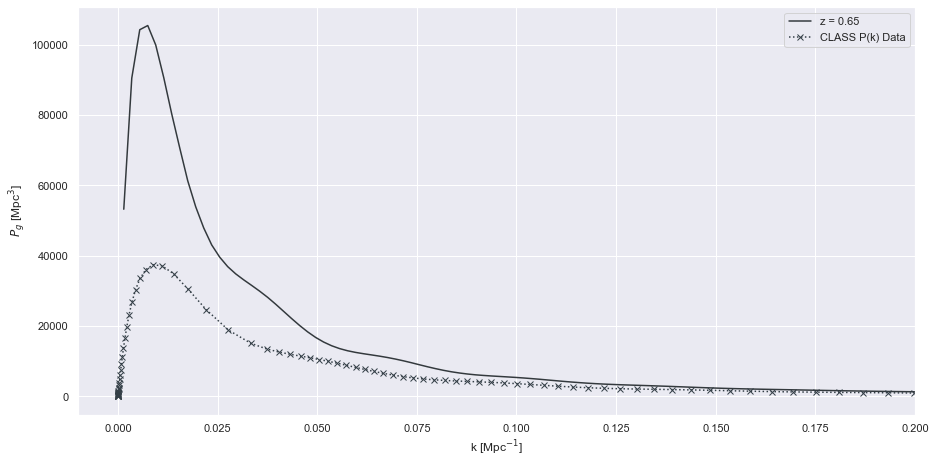

In [20]:
#For each z, plot inferred spectrum vs. CLASS data
sns.set()
sns.set_palette("Blues_d", n_colors=2*len(z_table)+1)
plt.figure(figsize=(15, 7.5))
for zidx, zval in enumerate(z_table[0:1]): 
    ps = lightrelic.spectra_mid[zidx]
    plt.plot(ps.k_table, ps.ps_table, label=("z = " + str(zval)))
    plt.plot(ps.class_pk['k (h/Mpc)']*0.70148,
             ps.class_pk['P (Mpc/h)^3']*np.power(0.70148, -3),
             label='CLASS P(k) Data',
             marker='x',
             linestyle=':')
plt.xlabel(r'k [Mpc$^{-1}$]')
plt.ylabel(r'$P_g$ [Mpc$^3$]')
plt.xlim(-0.01, 0.2)
plt.legend()
plt.show()
#Also plot difference between the two 

In [21]:
len(['a','b'])

2